In [278]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdullrahmannawasrah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abdullrahmannawasrah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [279]:
import pandas as pd 
import gensim
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from gensim.models import Word2Vec

In [280]:
dt= pd.read_excel("Tweet Emotion Dataset(1).xlsx")
dt

,@ZubairSabirPTI pls dont insult the word 'Molna',anger
0,@ArcticFantasy I would have almost took offens...,anger
1,@IllinoisLoyalty that Rutgers game was an abom...,anger
2,@CozanGaming that's what lisa asked before she...,anger
3,Sometimes I get mad over something so minuscul...,anger
4,Sometimes I get mad over something so minuscul...,anger
...,...,...
341,Common app just randomly logged me out as I wa...,sadness
342,"I'd rather laugh with the rarest genius, in be...",sadness
343,If you #invest in my new #film I will stop ask...,sadness
344,"Just watched Django Unchained, Other people ma...",sadness


In [281]:
dt.columns =['Tweet', 'Emotions']


# Lower the letters

In [282]:
dt['Tweet']=dt['Tweet'].str.lower()
dt

,Tweet,Emotions
0,@arcticfantasy i would have almost took offens...,anger
1,@illinoisloyalty that rutgers game was an abom...,anger
2,@cozangaming that's what lisa asked before she...,anger
3,sometimes i get mad over something so minuscul...,anger
4,sometimes i get mad over something so minuscul...,anger
...,...,...
341,common app just randomly logged me out as i wa...,sadness
342,"i'd rather laugh with the rarest genius, in be...",sadness
343,if you #invest in my new #film i will stop ask...,sadness
344,"just watched django unchained, other people ma...",sadness


#  Remove stopwords

In [283]:
stop_words = stopwords.words('english')

In [284]:
dt['Tweet'] = dt['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
dt

,Tweet,Emotions
0,@arcticfantasy would almost took offense actua...,anger
1,@illinoisloyalty rutgers game abomination. aff...,anger
2,@cozangaming that's lisa asked started raging ...,anger
3,sometimes get mad something minuscule try ruin...,anger
4,sometimes get mad something minuscule try ruin...,anger
...,...,...
341,common app randomly logged writing last part c...,sadness
342,"i'd rather laugh rarest genius, beautiful alli...",sadness
343,#invest new #film stop asking invest new film....,sadness
344,"watched django unchained, people may frown, ti...",sadness


# Remove punctuations


In [285]:
dt['Tweet']= dt['Tweet'].str.replace(r'[^\w\s]+', ' ',regex=True)
dt

,Tweet,Emotions
0,arcticfantasy would almost took offense actua...,anger
1,illinoisloyalty rutgers game abomination aff...,anger
2,cozangaming that s lisa asked started raging ...,anger
3,sometimes get mad something minuscule try ruin...,anger
4,sometimes get mad something minuscule try ruin...,anger
...,...,...
341,common app randomly logged writing last part c...,sadness
342,i d rather laugh rarest genius beautiful alli...,sadness
343,invest new film stop asking invest new film ...,sadness
344,watched django unchained people may frown ti...,sadness


In [286]:
dt['Tweet']= dt['Tweet'].str.replace(r'\n',  '',regex=True)
dt

,Tweet,Emotions
0,arcticfantasy would almost took offense actua...,anger
1,illinoisloyalty rutgers game abomination aff...,anger
2,cozangaming that s lisa asked started raging ...,anger
3,sometimes get mad something minuscule try ruin...,anger
4,sometimes get mad something minuscule try ruin...,anger
...,...,...
341,common app randomly logged writing last part c...,sadness
342,i d rather laugh rarest genius beautiful alli...,sadness
343,invest new film stop asking invest new film ...,sadness
344,watched django unchained people may frown ti...,sadness


In [287]:
dt['Tweet']= dt['Tweet'].str.replace(r'\t',  ' ',regex=True)
dt

,Tweet,Emotions
0,arcticfantasy would almost took offense actua...,anger
1,illinoisloyalty rutgers game abomination aff...,anger
2,cozangaming that s lisa asked started raging ...,anger
3,sometimes get mad something minuscule try ruin...,anger
4,sometimes get mad something minuscule try ruin...,anger
...,...,...
341,common app randomly logged writing last part c...,sadness
342,i d rather laugh rarest genius beautiful alli...,sadness
343,invest new film stop asking invest new film ...,sadness
344,watched django unchained people may frown ti...,sadness


In [288]:
dt['Tweet'] = dt['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
dt

,Tweet,Emotions
0,arcticfantasy would almost took offense actual...,anger
1,illinoisloyalty rutgers game abomination affro...,anger
2,cozangaming lisa asked started raging call heh,anger
3,sometimes get mad something minuscule try ruin...,anger
4,sometimes get mad something minuscule try ruin...,anger
...,...,...
341,common app randomly logged writing last part c...,sadness
342,rather laugh rarest genius beautiful alliance ...,sadness
343,invest new film stop asking invest new film co...,sadness
344,watched django unchained people may frown titt...,sadness


#  Type of each column

In [289]:
dt.dtypes

Tweet       object
Emotions    object
dtype: object

In [290]:
dt['Emotions'].value_counts()

fear       110
anger       83
joy         79
sadness     74
Name: Emotions, dtype: int64

<AxesSubplot:xlabel='Emotions', ylabel='count'>

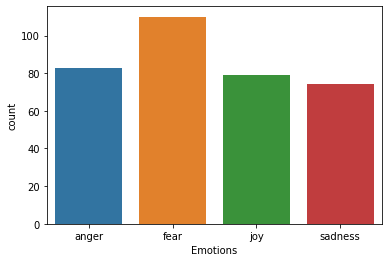

In [291]:
sns.countplot(x='Emotions',data=dt)

In [292]:
sents = dt['Tweet']
Labels = dt['Emotions']

# Stemming 

In [293]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
sents = sents.apply(lambda x: x.split())
sents = sents.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

# Vectorization

In [294]:
tv = TfidfVectorizer(max_features=1693)
sents = tv.fit_transform(sents)

# Split data

In [295]:
sents_train, sents_test, labels_train, labels_test = train_test_split(sents, Labels, test_size = .4, random_state = 0)

# Model linearsvc

In [296]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=5,loss="hinge")
lsvc.fit(sents_train, labels_train)
predict=lsvc.predict(sents_test)

In [297]:
print(accuracy_score(labels_test,predict))
print(classification_report(labels_test,predict))
print(confusion_matrix(labels_test,predict))

0.6834532374100719
              precision    recall  f1-score   support

       anger       0.75      0.62      0.68        34
        fear       0.69      0.73      0.71        49
         joy       0.75      0.64      0.69        33
     sadness       0.55      0.74      0.63        23

    accuracy                           0.68       139
   macro avg       0.69      0.68      0.68       139
weighted avg       0.70      0.68      0.68       139

[[21  6  2  5]
 [ 4 36  4  5]
 [ 2  6 21  4]
 [ 1  4  1 17]]


In [298]:
dt_test = pd.read_excel("test_dataset.xlsx")
dt_test

,"At the point today where if someone says something remotely kind to me, a waterfall will burst out of my eyes",?
0,@CorningFootball IT'S GAME DAY!!!! T MIN...,?
1,This game has pissed me off more than any othe...,?
2,@spamvicious I've just found out it's Candice ...,?
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,?
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,?
...,...,...
3136,Why does Candice constantly pout #GBBO üíÑüòí,?
3137,"@redBus_in #unhappy with #redbus CC, when I ta...",?
3138,"@AceOperative789 no pull him afew weeks ago, s...",?
3139,I'm buying art supplies and I'm debating how s...,?


In [299]:
dt_test.columns =['Tweet', 'Emotions']
dt_test

,Tweet,Emotions
0,@CorningFootball IT'S GAME DAY!!!! T MIN...,?
1,This game has pissed me off more than any othe...,?
2,@spamvicious I've just found out it's Candice ...,?
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,?
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,?
...,...,...
3136,Why does Candice constantly pout #GBBO üíÑüòí,?
3137,"@redBus_in #unhappy with #redbus CC, when I ta...",?
3138,"@AceOperative789 no pull him afew weeks ago, s...",?
3139,I'm buying art supplies and I'm debating how s...,?


In [300]:
dt_test=dt_test.drop(columns=['Emotions'])
dt_test

,Tweet
0,@CorningFootball IT'S GAME DAY!!!! T MIN...
1,This game has pissed me off more than any othe...
2,@spamvicious I've just found out it's Candice ...
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...
3136,Why does Candice constantly pout #GBBO üíÑüòí
3137,"@redBus_in #unhappy with #redbus CC, when I ta..."
3138,"@AceOperative789 no pull him afew weeks ago, s..."
3139,I'm buying art supplies and I'm debating how s...


In [301]:
dt_test['Tweet']=dt_test['Tweet'].str.lower()
dt_test

,Tweet
0,@corningfootball it's game day!!!! t min...
1,this game has pissed me off more than any othe...
2,@spamvicious i've just found out it's candice ...
3,@moocowward @mrsajhargreaves @melly77 @garybar...
4,@moocowward @mrsajhargreaves @melly77 @garybar...
...,...
3136,why does candice constantly pout #gbbo üíñüòí
3137,"@redbus_in #unhappy with #redbus cc, when i ta..."
3138,"@aceoperative789 no pull him afew weeks ago, s..."
3139,i'm buying art supplies and i'm debating how s...


In [302]:
dt_test['Tweet'] = dt_test['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
dt_test

,Tweet
0,@corningfootball game day!!!! minus 14:30 #rel...
1,game pissed game year. blood boiling! time tur...
2,@spamvicious i've found candice candace. pout ...
3,@moocowward @mrsajhargreaves @melly77 @garybar...
4,@moocowward @mrsajhargreaves @melly77 @garybar...
...,...
3136,candice constantly pout #gbbo üíñüòí
3137,"@redbus_in #unhappy #redbus cc, talked week st..."
3138,"@aceoperative789 pull afew weeks ago, sadly th..."
3139,i'm buying art supplies i'm debating serious b...


In [303]:
dt_test['Tweet']= dt_test['Tweet'].str.replace(r'[^\w\s]+', ' ',regex=True)
dt_test

,Tweet
0,corningfootball game day minus 14 30 relent...
1,game pissed game year blood boiling time tur...
2,spamvicious i ve found candice candace pout ...
3,moocowward mrsajhargreaves melly77 garybar...
4,moocowward mrsajhargreaves melly77 garybar...
...,...
3136,candice constantly pout gbbo üíñ üòí
3137,redbus_in unhappy redbus cc talked week st...
3138,aceoperative789 pull afew weeks ago sadly th...
3139,i m buying art supplies i m debating serious b...


In [304]:
dt_test['Tweet']= dt_test['Tweet'].str.replace(r'\n',  '',regex=True)
dt_test

,Tweet
0,corningfootball game day minus 14 30 relent...
1,game pissed game year blood boiling time tur...
2,spamvicious i ve found candice candace pout ...
3,moocowward mrsajhargreaves melly77 garybar...
4,moocowward mrsajhargreaves melly77 garybar...
...,...
3136,candice constantly pout gbbo üíñ üòí
3137,redbus_in unhappy redbus cc talked week st...
3138,aceoperative789 pull afew weeks ago sadly th...
3139,i m buying art supplies i m debating serious b...


In [305]:
dt_test['Tweet']= dt_test['Tweet'].str.replace(r'\t',  ' ',regex=True)
dt_test

,Tweet
0,corningfootball game day minus 14 30 relent...
1,game pissed game year blood boiling time tur...
2,spamvicious i ve found candice candace pout ...
3,moocowward mrsajhargreaves melly77 garybar...
4,moocowward mrsajhargreaves melly77 garybar...
...,...
3136,candice constantly pout gbbo üíñ üòí
3137,redbus_in unhappy redbus cc talked week st...
3138,aceoperative789 pull afew weeks ago sadly th...
3139,i m buying art supplies i m debating serious b...


In [306]:
dt_test['Tweet'] = dt_test['Tweet'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
dt_test

,Tweet
0,corningfootball game day minus 14 30 relentless
1,game pissed game year blood boiling time turn ...
2,spamvicious found candice candace pout likes üòç
3,moocowward mrsajhargreaves melly77 garybarlow ...
4,moocowward mrsajhargreaves melly77 garybarlow ...
...,...
3136,candice constantly pout gbbo üíñ üòí
3137,redbus_in unhappy redbus cc talked week still ...
3138,aceoperative789 pull afew weeks ago sadly ther...
3139,buying art supplies debating serious buy acryl...


In [307]:
dt_test=dt_test.replace('\d+', '', regex=True)
dt_test

,Tweet
0,corningfootball game day minus relentless
1,game pissed game year blood boiling time turn ...
2,spamvicious found candice candace pout likes üòç
3,moocowward mrsajhargreaves melly garybarlow co...
4,moocowward mrsajhargreaves melly garybarlow co...
...,...
3136,candice constantly pout gbbo üíñ üòí
3137,redbus_in unhappy redbus cc talked week still ...
3138,aceoperative pull afew weeks ago sadly theres ...
3139,buying art supplies debating serious buy acryl...


In [308]:
sents_test = dt_test['Tweet']
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
sents_test = sents_test.apply(lambda x: x.split())
sents_test = sents_test.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [309]:
tv = TfidfVectorizer(max_features=1693)
sents_test = tv.fit_transform(sents_test)

In [310]:
pre=lsvc.predict(sents_test)
dt_test['Emotions']=pre

In [311]:
dt_test

,Tweet,Emotions
0,corningfootball game day minus relentless,fear
1,game pissed game year blood boiling time turn ...,anger
2,spamvicious found candice candace pout likes üòç,anger
3,moocowward mrsajhargreaves melly garybarlow co...,fear
4,moocowward mrsajhargreaves melly garybarlow co...,fear
...,...,...
3136,candice constantly pout gbbo üíñ üòí,anger
3137,redbus_in unhappy redbus cc talked week still ...,sadness
3138,aceoperative pull afew weeks ago sadly theres ...,anger
3139,buying art supplies debating serious buy acryl...,sadness


<AxesSubplot:xlabel='Emotions', ylabel='count'>

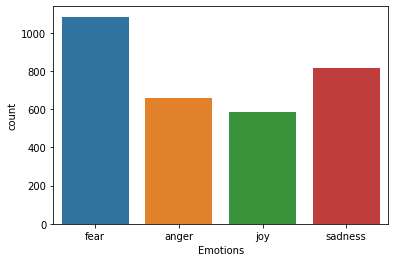

In [316]:
sns.countplot(x='Emotions',data=dt_test)

In [317]:
dt_test.to_excel("test_dataset.xlsx")